<h1 style="text-align:center;font-size:50px;color:darkblue;">Audio Preprocessing Module 👇</h1>

# imports

In [84]:
import numpy
import pandas
import matplotlib.pyplot as pyplot
import seaborn
import os
import random

import librosa
import librosa.display
from IPython.display import Audio

import pickle

## configurations

In [7]:
# %matplotlib qt;
%matplotlib inline
pyplot.rcParams["figure.figsize"] = (15, 12);

In [3]:
Data_Path="../Data/Main_Data"

In [74]:
Training_Data_Ratio=0.8

In [5]:
class_list=os.listdir(Data_Path)

In [6]:
class_list

['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise']

In [87]:
Number_of_Seconds_limit=5

In [88]:
Number_of_MFCC_Values=50

# Data Exploration

In [56]:
def graphsForAudios(audio_path,class_name):
    audio_data, sampling_rate = librosa.load(audio_path)
    print(audio_data)
    print(len(audio_data))
    print(sampling_rate)
    pyplot.title(class_name, size=20)
    librosa.display.waveshow(audio_data, sr=sampling_rate)
    pyplot.show()
    fourier_transform_value = librosa.stft(audio_data)
    print(fourier_transform_value)
#     librosa.display.specshow(fourier_transform_value)
#     pyplot.show()
    decibel_values = librosa.amplitude_to_db(abs(fourier_transform_value))
    librosa.display.specshow(decibel_values,sr=sampling_rate)
    pyplot.colorbar()
    pyplot.show()

[-8.17980072e-06 -1.92719643e-04 -2.84470647e-04 ...  1.55152928e-04
  1.13632064e-04  0.00000000e+00]
33936
22050


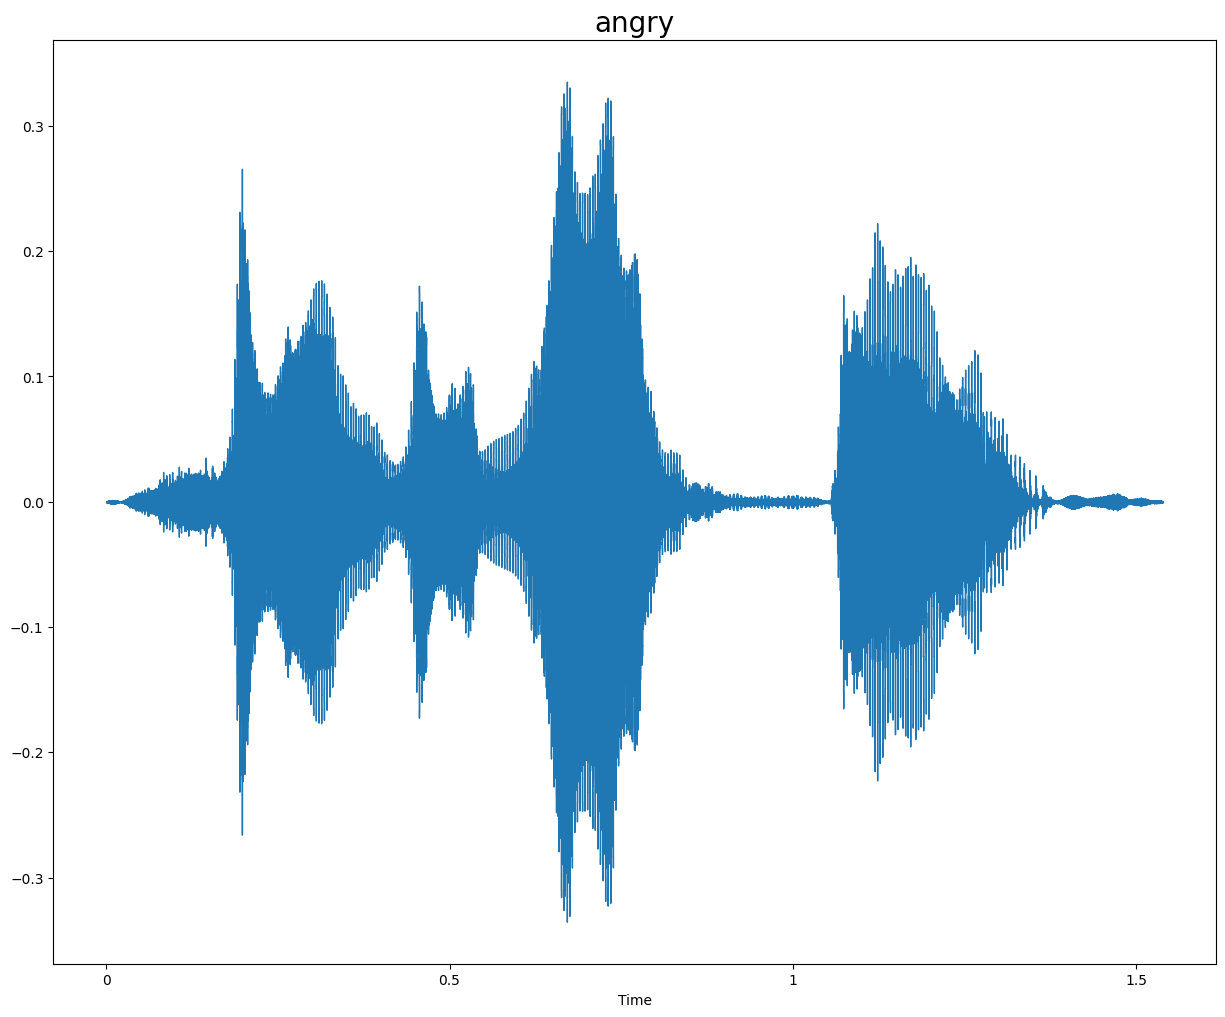

[[-4.5743829e-01+0.0000000e+00j -1.0653149e+00+0.0000000e+00j
  -6.6436267e-01+0.0000000e+00j ...  2.2941191e+00+0.0000000e+00j
   1.3557009e+00+0.0000000e+00j  6.9397771e-01+0.0000000e+00j]
 [ 1.8614261e-01-2.9025894e-01j  6.7394876e-01-3.2843798e-01j
   5.5766112e-01+7.3007643e-01j ... -9.3130499e-01-7.1092278e-01j
  -7.4653393e-01-1.9084999e-01j -2.9808733e-01-4.3086565e-01j]
 [-2.9012181e-02+1.5856835e-01j  1.3486108e-01+3.2160637e-01j
  -4.5597965e-01-7.4052310e-01j ... -4.9688438e-01+4.4162703e-01j
   2.6896879e-01-7.1909398e-02j -6.6522650e-02+1.6031221e-01j]
 ...
 [ 4.0419673e-06-5.5715201e-08j -2.5269308e-06+1.9667777e-07j
   7.7700054e-07+1.7193796e-06j ... -3.0332686e-07-4.2887544e-07j
  -5.2643459e-06-6.0385514e-06j  1.7563834e-05+2.0443835e-05j]
 [-3.9259339e-06+4.1810431e-08j  4.8781573e-08+1.2357204e-06j
  -1.9375318e-06-1.1508845e-06j ... -9.1076501e-08+4.1372036e-07j
   3.4392565e-06-7.6154943e-06j -2.4651303e-05-1.1236782e-05j]
 [ 4.0089808e-06+0.0000000e+00j  2.79063

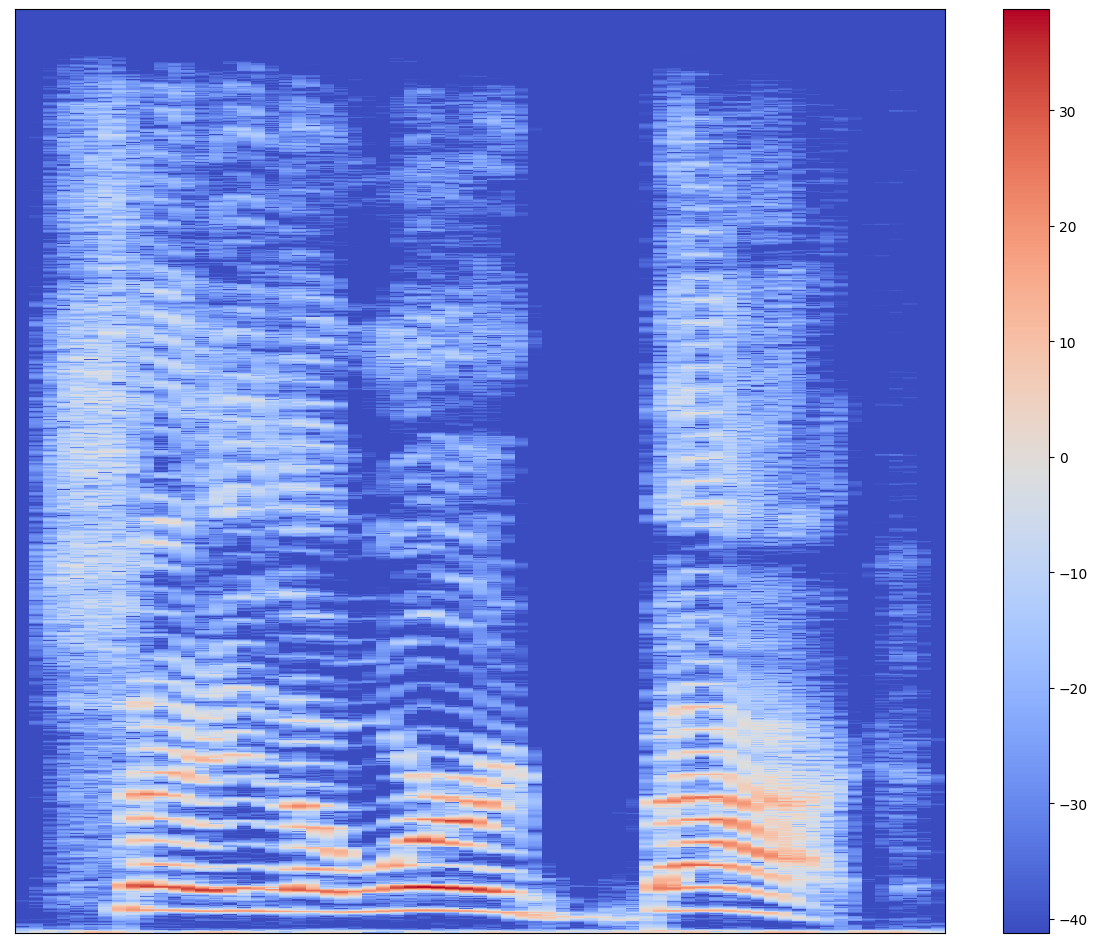

In [57]:
graphsForAudios("../Data/Main_Data/angry/OAF_back_angry.wav",'angry')

In [58]:
def showGraphsOfAudios(folder_path,number_of_audios=1,list_of_paths=[i for i in class_list]):
    for class_name in list_of_paths:
        print(class_name)
        class_path=os.path.join(folder_path,class_name)
        counter=1
        for audio_file in os.listdir(class_path):
            graphsForAudios(os.path.join(class_path,audio_file),class_name)
            if counter>=number_of_audios:
                break

sad
[-9.9371782e-06 -1.7859971e-05 -5.7671088e-05 ...  6.8926289e-05
  1.1823991e-04  0.0000000e+00]
56501
22050


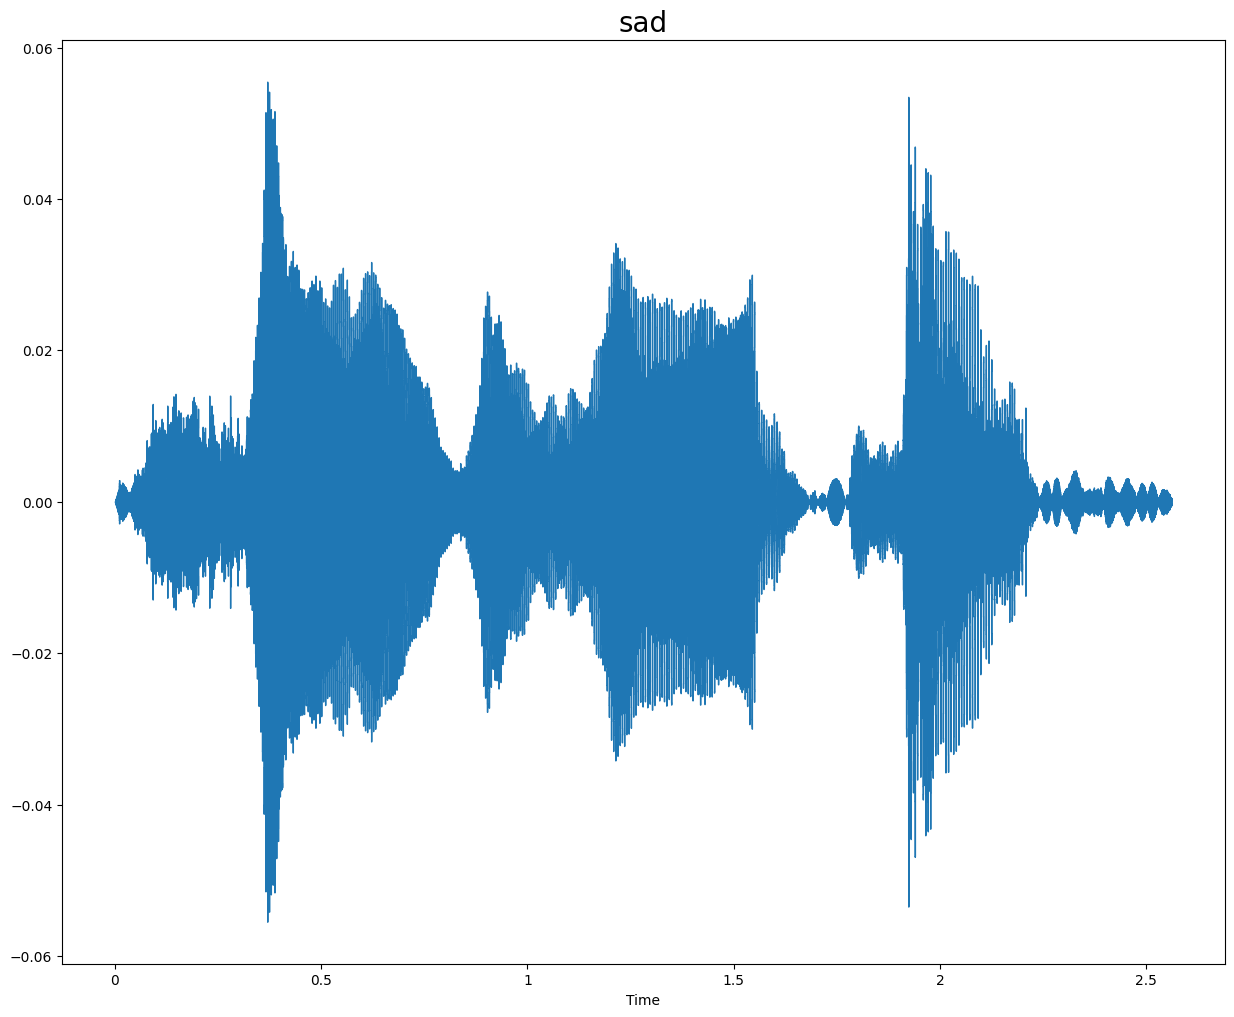

[[ 6.9955057e-01+0.0000000e+00j  1.3295256e+00+0.0000000e+00j
   1.1391841e+00+0.0000000e+00j ... -1.7373563e-01+0.0000000e+00j
  -1.0690918e-02+0.0000000e+00j  5.4212314e-01+0.0000000e+00j]
 [-3.0116782e-01+5.2893257e-01j -8.3322698e-01+8.6239010e-02j
  -7.7415800e-01-2.5848725e-01j ...  4.8474020e-01-6.3662922e-01j
  -5.8833417e-03+7.9369366e-01j -5.0885642e-01-2.2621675e-01j]
 [-1.7248864e-01-3.6455217e-01j  2.1197155e-01+2.4499880e-01j
   2.1194762e-01-2.3192991e-01j ... -6.7790735e-01+8.1305325e-01j
   1.9675109e-01-7.8473800e-01j  1.7429060e-01+3.7857357e-01j]
 ...
 [ 9.7452794e-06+1.5488435e-07j -4.8054721e-06-3.3682682e-07j
   8.6806597e-07+1.3957967e-07j ...  8.6775891e-08-2.9646035e-08j
   6.3832736e-06+1.2914469e-05j -2.4849714e-05-5.0598366e-05j]
 [-9.7731190e-06-8.0490054e-08j  7.9556216e-08+4.9933483e-06j
   1.0738011e-07+2.8793963e-07j ... -1.9038663e-07-7.7528156e-08j
  -7.7738514e-06+1.2230768e-05j  4.7744285e-05+2.9896710e-05j]
 [ 9.7712264e-06+0.0000000e+00j  4.87366

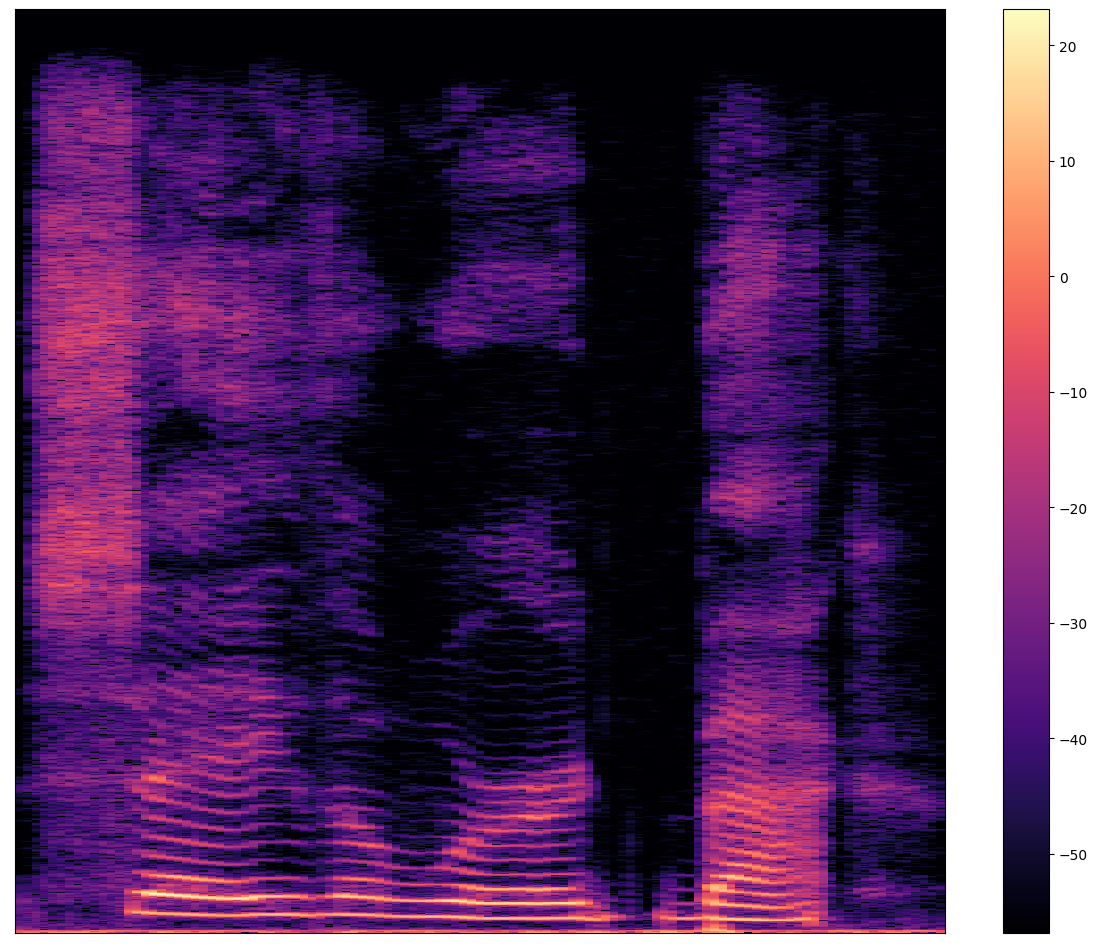

In [59]:
showGraphsOfAudios(Data_Path,list_of_paths=['sad'])

# Feature Extraction

In [66]:
def getFeatureOfTheAudios(folder_path,number_of_audios=False,list_of_paths=[i for i in class_list]):
    Whole_Data=[]
    for class_name in list_of_paths:
        print(class_name)
        class_path=os.path.join(folder_path,class_name)
        counter=1
        for audio_file in os.listdir(class_path):
            print(counter,end=",")
            audio_time_series,sample_rate=librosa.load(os.path.join(class_path,audio_file),duration=Number_of_Seconds_limit)
#             print(audio_time_series)
            mfcc_sequence=librosa.feature.mfcc(y=audio_time_series, sr=sample_rate, n_mfcc=Number_of_MFCC_Values)
#             print(mfcc_sequence)
            mfcc_value = numpy.mean(mfcc_sequence.T, axis=0)
#             print(mfcc_value)
            Whole_Data.append([mfcc_value,class_list.index(class_name)])
            if number_of_audios!=False and counter>=number_of_audios:
                break
            counter+=1
        print()
    return Whole_Data

In [67]:
Whole_Data=getFeatureOfTheAudios(Data_Path)

In [73]:
Whole_Data[0]

[array([-4.18798218e+02,  7.48116760e+01,  3.01385612e+01,  3.98013954e+01,
         3.57863450e+00,  1.09260960e+01, -7.31320190e+00, -1.35921488e+01,
         3.25615168e+00, -3.92795157e+00, -1.10139790e+01,  5.23472834e+00,
        -1.07355366e+01,  1.15020094e+01, -9.35734177e+00,  1.70169640e+00,
        -2.72698689e+00,  4.42548603e-01, -9.29236507e+00, -1.57702506e+00,
        -7.19552279e+00, -4.58809042e+00, -6.77840185e+00,  6.26555824e+00,
        -1.12396920e+00,  7.47305393e+00,  1.72929847e+00,  1.06180191e+00,
        -2.59676623e+00,  3.33869874e-01, -1.11546600e+00,  1.17908125e+01,
         6.78021049e+00,  5.24364996e+00,  1.30053401e+00,  1.97481680e+00,
         2.99838161e+00,  9.03435135e+00,  6.56354713e+00,  9.99153996e+00,
         1.72419977e+00,  3.30238700e+00, -2.26781273e+00, -1.96942031e-01,
        -1.46065688e+00,  2.77098149e-01, -7.28942156e-01, -1.55185151e+00,
         4.67371136e-01,  3.49216104e+00], dtype=float32),
 4]

In [70]:
random.shuffle(Whole_Data)

In [72]:
Whole_Data[0]

[array([-4.18798218e+02,  7.48116760e+01,  3.01385612e+01,  3.98013954e+01,
         3.57863450e+00,  1.09260960e+01, -7.31320190e+00, -1.35921488e+01,
         3.25615168e+00, -3.92795157e+00, -1.10139790e+01,  5.23472834e+00,
        -1.07355366e+01,  1.15020094e+01, -9.35734177e+00,  1.70169640e+00,
        -2.72698689e+00,  4.42548603e-01, -9.29236507e+00, -1.57702506e+00,
        -7.19552279e+00, -4.58809042e+00, -6.77840185e+00,  6.26555824e+00,
        -1.12396920e+00,  7.47305393e+00,  1.72929847e+00,  1.06180191e+00,
        -2.59676623e+00,  3.33869874e-01, -1.11546600e+00,  1.17908125e+01,
         6.78021049e+00,  5.24364996e+00,  1.30053401e+00,  1.97481680e+00,
         2.99838161e+00,  9.03435135e+00,  6.56354713e+00,  9.99153996e+00,
         1.72419977e+00,  3.30238700e+00, -2.26781273e+00, -1.96942031e-01,
        -1.46065688e+00,  2.77098149e-01, -7.28942156e-01, -1.55185151e+00,
         4.67371136e-01,  3.49216104e+00], dtype=float32),
 4]

In [75]:
Training_Data=Whole_Data[:int(len(Whole_Data)*Training_Data_Ratio)]
Testing_Data=Whole_Data[int(len(Whole_Data)*Training_Data_Ratio):]

In [76]:
Training_Features=[]
Training_Label=[]
for audio_mfcc,label in Training_Data:
    Training_Features.append(audio_mfcc)
    Training_Label.append(label)
Training_Features=numpy.array(Training_Features)
Training_Label=numpy.array(Training_Label)

In [77]:
Training_Features.shape

(1920, 50)

In [78]:
Training_Label.shape

(1920,)

In [79]:
Testing_Features=[]
Testing_Label=[]
for audio_mfcc,label in Testing_Data:
    Testing_Features.append(audio_mfcc)
    Testing_Label.append(label)
Testing_Features=numpy.array(Testing_Features)
Testing_Label=numpy.array(Testing_Label)

In [80]:
Testing_Features.shape

(480, 50)

In [81]:
Testing_Label.shape

(480,)

# Saving The Processed Data

In [82]:
Saving_Path="../Data/Preprocessed_Data/"

In [85]:
pickle_training_features=open(Saving_Path+"pickle_training_features.pickle","wb")
pickle.dump(Training_Features,pickle_training_features)
pickle_training_features.close()
pickle_training_labels=open(Saving_Path+"pickle_training_labels.pickle","wb")
pickle.dump(Training_Label,pickle_training_labels)
pickle_training_labels.close()

In [86]:
pickle_testing_features=open(Saving_Path+"pickle_testing_features.pickle","wb")
pickle.dump(Testing_Features,pickle_testing_features)
pickle_testing_features.close()
pickle_testing_labels=open(Saving_Path+"pickle_testing_labels.pickle","wb")
pickle.dump(Testing_Label,pickle_testing_labels)
pickle_testing_labels.close()